Esse notebook foi utilizado para verificar todos os dados do experimento


dataframe1.to_csv("../data/processed/exp.csv")
dataframe2.to_csv("../data/processed/intensidade.csv")
dataframe3.to_csv("../data/processed/riscos.csv")
dataframe4.to_csv("../data/processed/duracao.csv")

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [30]:
df = pd.read_csv("../data/processed/all.csv") \
.drop(["Unnamed: 0", "DepressionHxTrt", "DepressionHxLim"], axis =1)

In [31]:
df

,age,Mobility,Care,Active,Pain,CGIPD,DepressionHx,LeisureHours,WalkDay,WalkHours,...,StrengthDay,StrengthHours,Work,WorkActive,MindStress,MindAnxietyPDSympTremor,MindAnxietyPDSympSleep,MindAnxietyPDSympOther,pa1a,pa7a
0,82.1,1.0,0.0,1.0,1.0,-1.0,1.0,4.0,3.0,2.0,...,2.0,2.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,63.3,2.0,1.0,1.0,2.0,-1.0,0.0,3.0,0.0,-1.0,...,0.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,87.7,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,62.8,0.0,0.0,1.0,0.0,-1.0,0.0,3.0,3.0,2.0,...,1.0,1.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,67.1,0.0,0.0,0.0,1.0,-1.0,1.0,3.0,3.0,3.0,...,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29378,64.6,1.0,0.0,0.0,1.0,-1.0,0.0,4.0,0.0,-1.0,...,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
29379,62.1,1.0,1.0,0.0,0.0,-1.0,0.0,3.0,3.0,1.0,...,0.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
29380,81.2,4.0,4.0,4.0,2.0,-1.0,1.0,3.0,0.0,-1.0,...,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
29381,67.6,0.0,0.0,1.0,1.0,-1.0,0.0,4.0,3.0,1.0,...,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


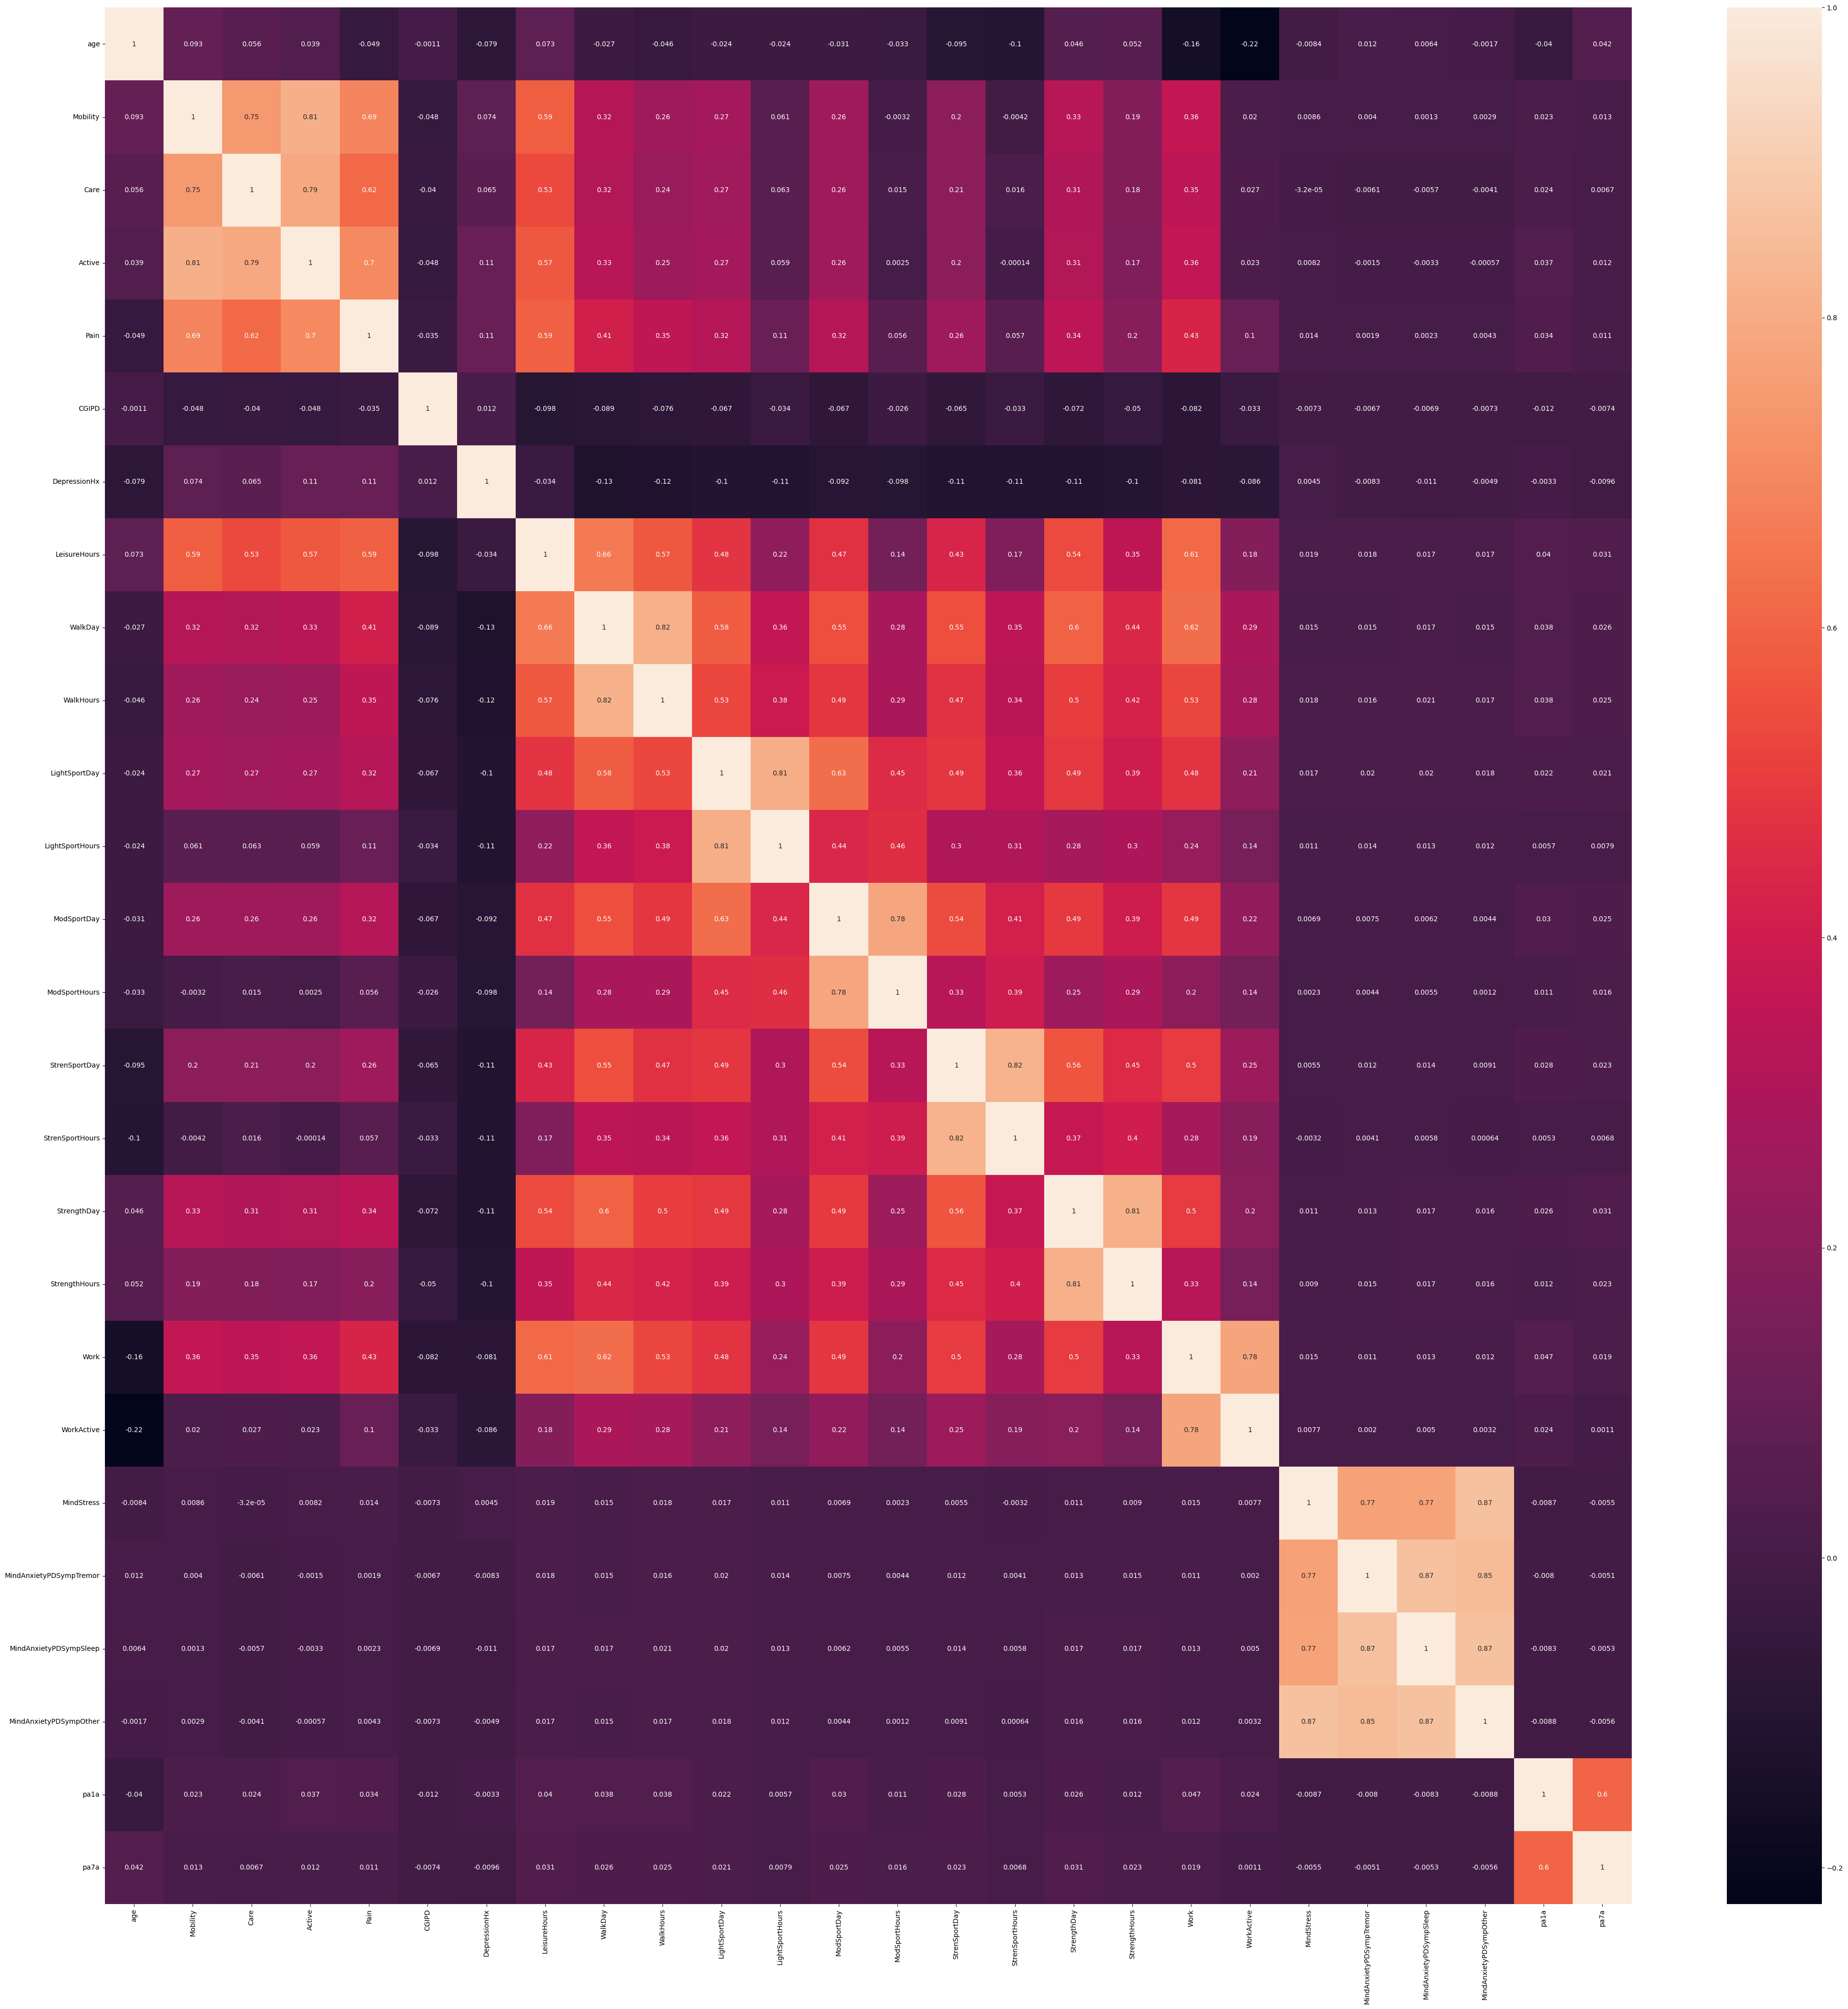

In [32]:
fig, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(data=df.corr(),annot=True,)
plt.savefig("../assets/all/heatmap_.jpg")
plt.show()

### Classificador simples

In [33]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [34]:
def report(X_val, y_val, model, name):
    
    print(f"Validação {name}")

    y_pred = model.predict(X_val)

    print(classification_report(y_val, y_pred))


    conf_matrix = confusion_matrix(y_val, y_pred)

    ax = plt.subplot()
    sns.heatmap(conf_matrix, annot = True, ax = ax)

    ax.set_xlabel("Predicted") ; ax.set_ylabel("True");
    ax.set_title("Matriz de confusão")
    
    plt.savefig("../assets/all/model"+name+".jpg", bbox_inches='tight')
    plt.show()

In [35]:
df['DepressionHx'].value_counts()

0.0    15440
1.0    13832
3.0      111
Name: DepressionHx, dtype: int64

In [36]:
df = df.query("DepressionHx != 3")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29272 entries, 0 to 29382
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      29272 non-null  float64
 1   Mobility                 29272 non-null  float64
 2   Care                     29272 non-null  float64
 3   Active                   29272 non-null  float64
 4   Pain                     29272 non-null  float64
 5   CGIPD                    29272 non-null  float64
 6   DepressionHx             29272 non-null  float64
 7   LeisureHours             29272 non-null  float64
 8   WalkDay                  29272 non-null  float64
 9   WalkHours                29272 non-null  float64
 10  LightSportDay            29272 non-null  float64
 11  LightSportHours          29272 non-null  float64
 12  ModSportDay              29272 non-null  float64
 13  ModSportHours            29272 non-null  float64
 14  StrenSportDay         

In [38]:
df = df[['age', 'Mobility', 'Care', 'Active', 'Pain', 'CGIPD', 
       'LeisureHours', 'WalkDay', 'WalkHours', 'LightSportDay',
       'LightSportHours', 'ModSportDay', 'ModSportHours', 'StrenSportDay',
       'StrenSportHours', 'StrengthDay', 'StrengthHours', 'Work', 'WorkActive',
       'MindStress', 'MindAnxietyPDSympTremor', 'MindAnxietyPDSympSleep',
       'MindAnxietyPDSympOther', 'pa1a', 'pa7a', 'DepressionHx']]

In [39]:
df.iloc[:, 25].values

array([1., 0., 0., ..., 1., 0., 0.])

In [40]:
X_dados = df.iloc[:, 0:25].values
Y_dados = df.iloc[:, 25].values

In [41]:
## Separando dados de teste
X_train, X_test, y_train, y_test = train_test_split(X_dados, Y_dados, test_size = 0.2, random_state = 0)

## Separando em validação e treino
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

#### SVM

In [42]:
clf = svm.SVC().fit(X_train, y_train)

Validação SVM
              precision    recall  f1-score   support

         0.0       0.62      0.71      0.66      2486
         1.0       0.61      0.51      0.55      2198

    accuracy                           0.61      4684
   macro avg       0.61      0.61      0.61      4684
weighted avg       0.61      0.61      0.61      4684



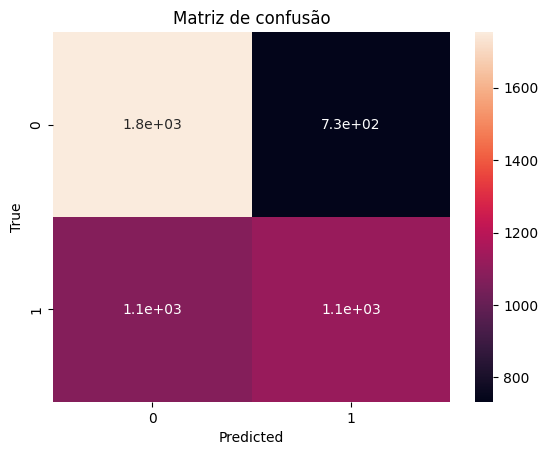

In [43]:
report(X_val, y_val, clf, "SVM")

In [44]:
filename = '../models/svm-all.sav'
pickle.dump(clf, open(filename, 'wb'))

### Regressão Logística

In [45]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs').fit(X_train, y_train)

filename = '../models/rl-all.sav'
pickle.dump(model, open(filename, 'wb'))

j:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validação RL
              precision    recall  f1-score   support

         0.0       0.62      0.69      0.65      2486
         1.0       0.60      0.52      0.56      2198

    accuracy                           0.61      4684
   macro avg       0.61      0.61      0.61      4684
weighted avg       0.61      0.61      0.61      4684



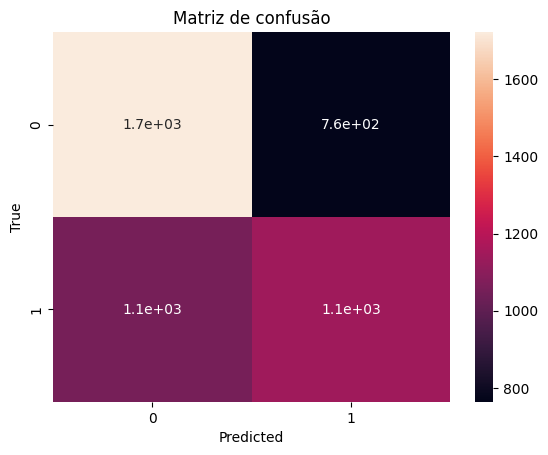

In [46]:
report(X_val, y_val, model, "RL")

### KNN

In [47]:
knn = KNeighborsClassifier().fit(X_train, y_train)

filename = '../models/knn-all.sav'
pickle.dump(knn, open(filename, 'wb'))

Validação knn
              precision    recall  f1-score   support

         0.0       0.59      0.61      0.60      2486
         1.0       0.54      0.51      0.52      2198

    accuracy                           0.57      4684
   macro avg       0.56      0.56      0.56      4684
weighted avg       0.56      0.57      0.57      4684



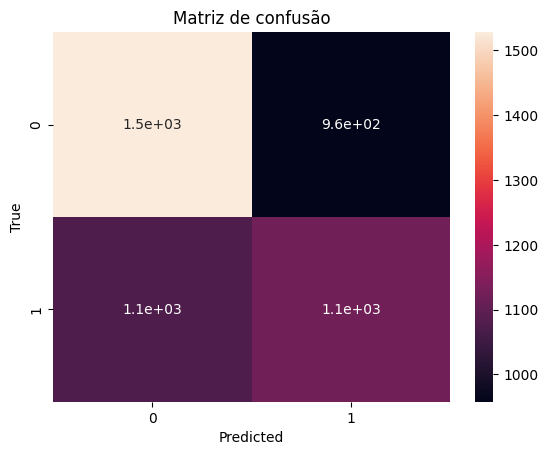

In [48]:
report(X_val, y_val, knn, "knn")

### Random Forest

In [49]:
rf = RandomForestClassifier().fit(X_train, y_train)

filename = '../models/rf-all.sav'
pickle.dump(rf, open(filename, 'wb'))

Validação rf
              precision    recall  f1-score   support

         0.0       0.60      0.66      0.63      2486
         1.0       0.57      0.51      0.54      2198

    accuracy                           0.59      4684
   macro avg       0.59      0.59      0.58      4684
weighted avg       0.59      0.59      0.59      4684



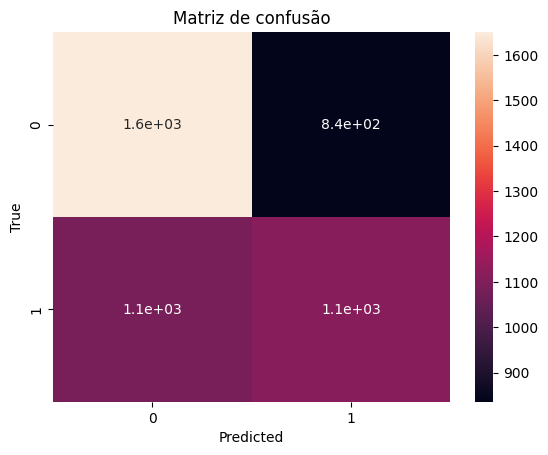

In [50]:
report(X_val, y_val, rf, "rf")